![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

['route', 'mean_dep_delay', 'total_cancellations']


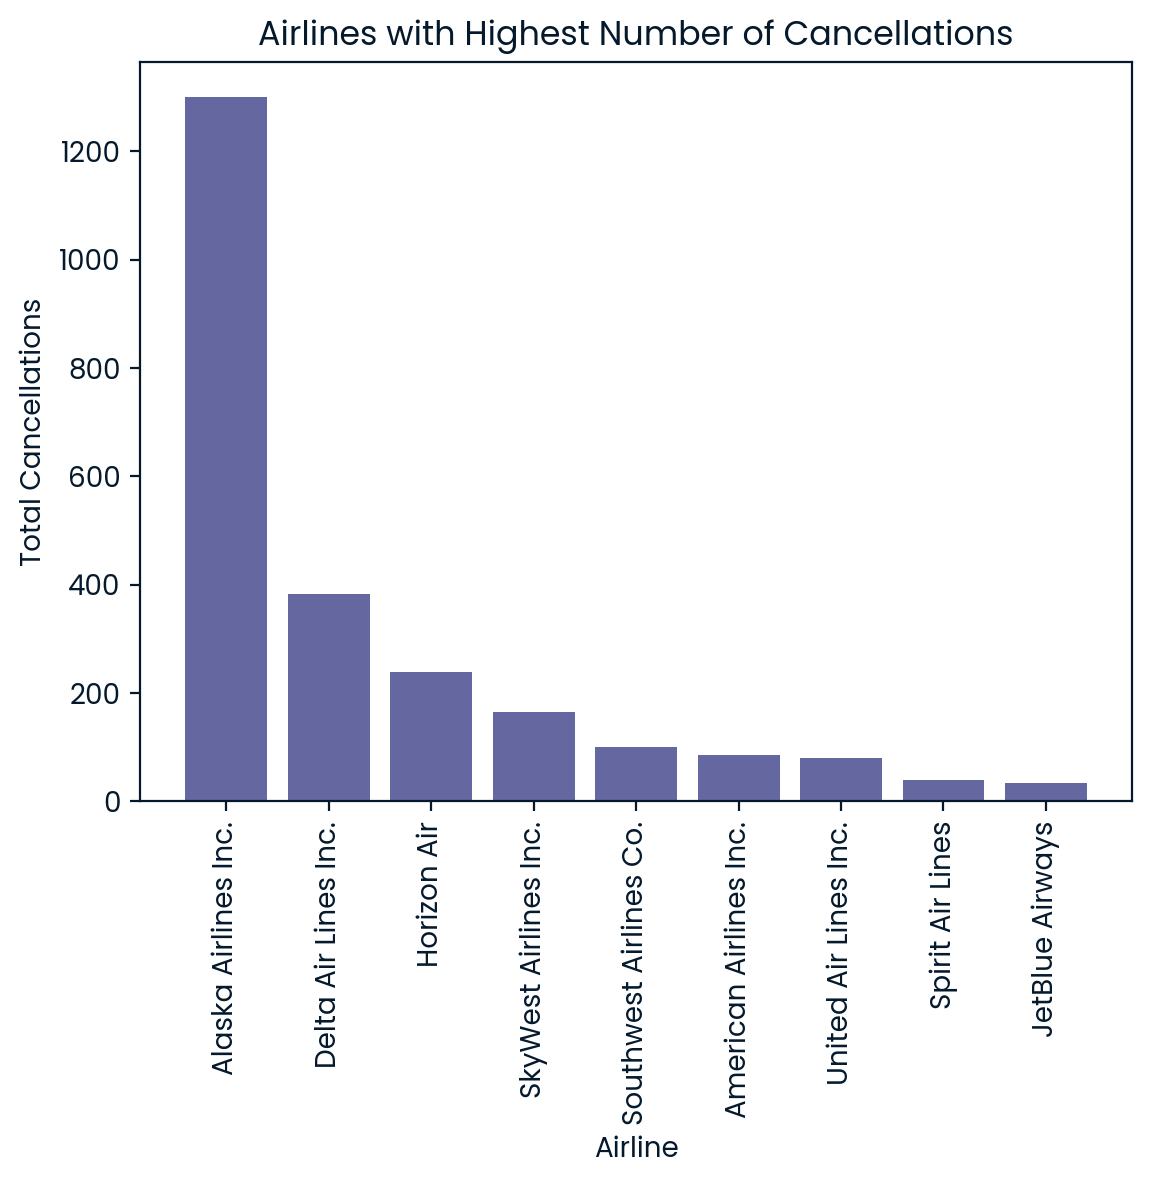

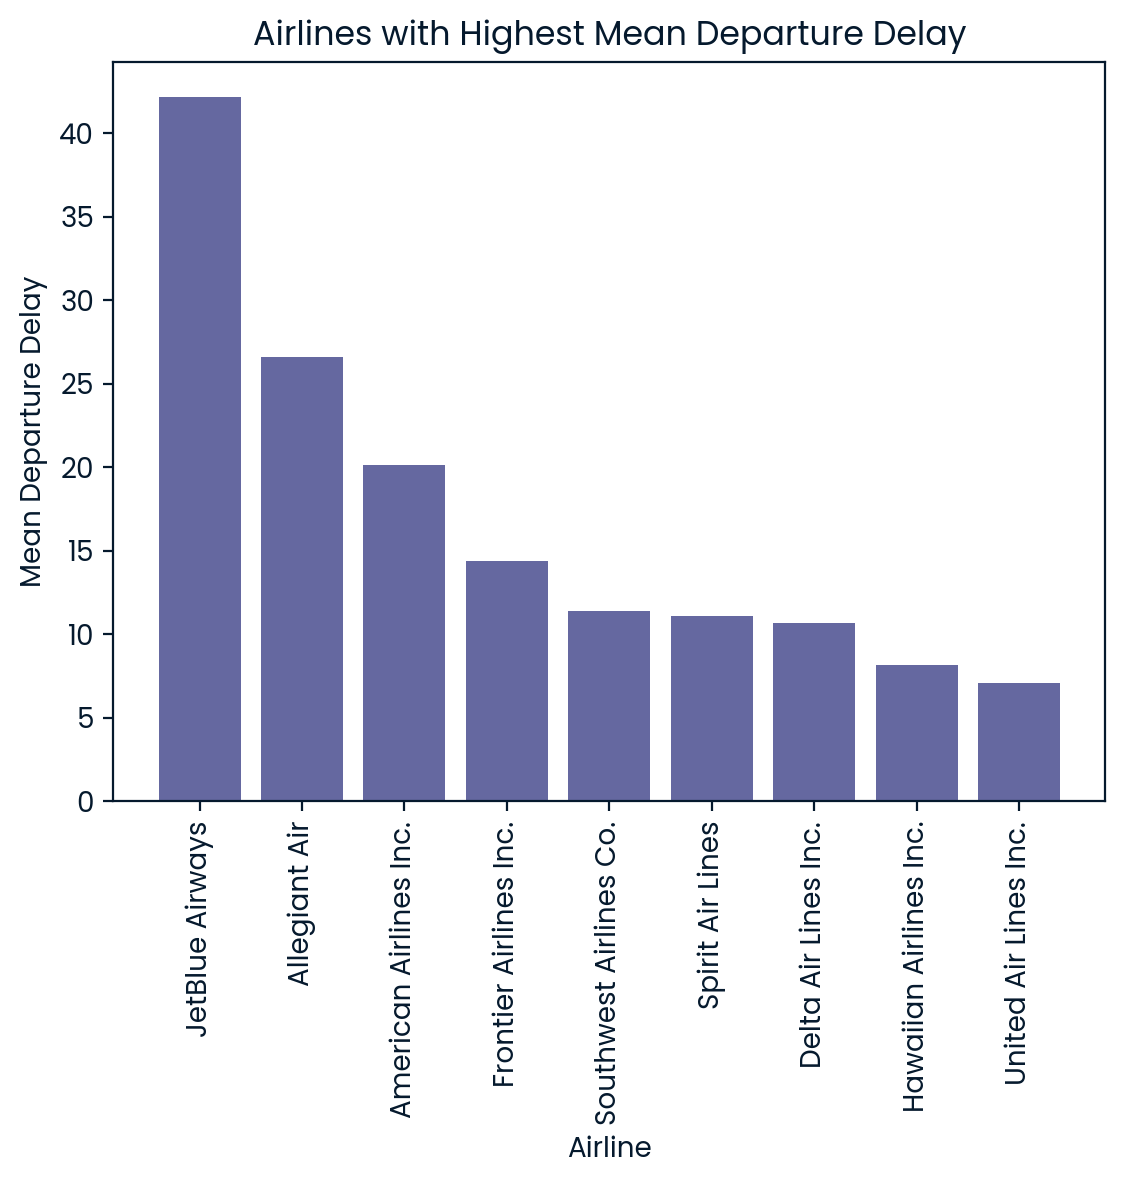

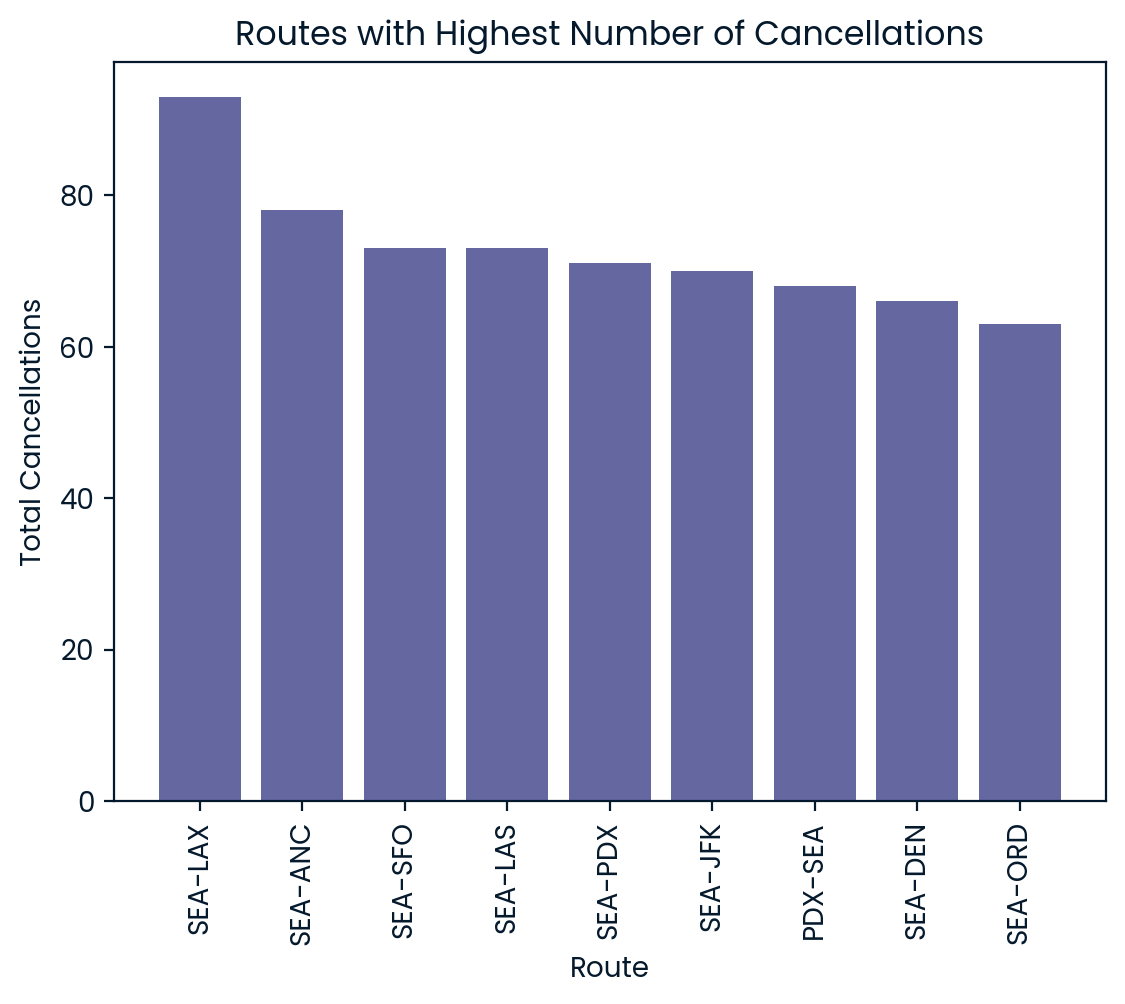

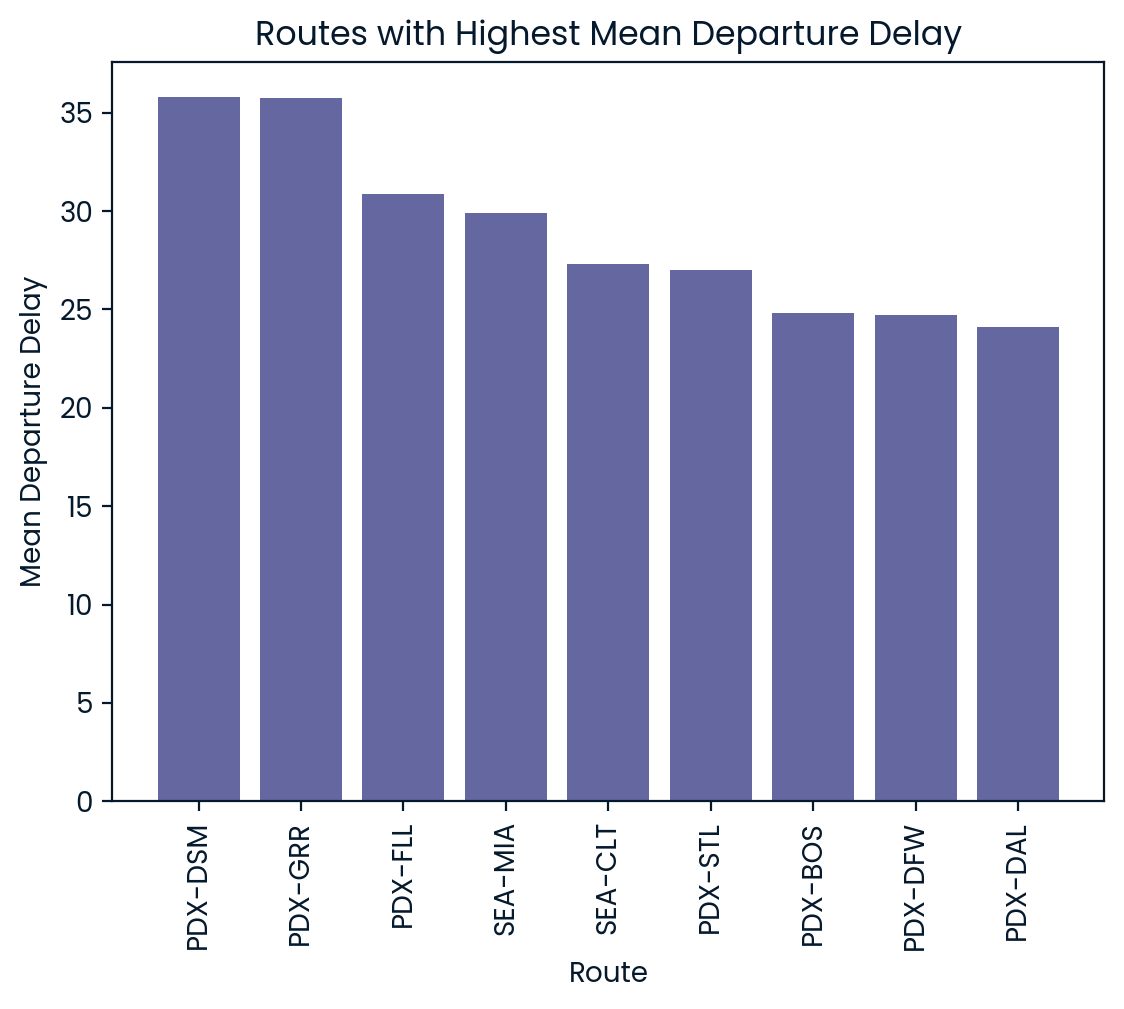

Wind Gusts Effect on Flight Delays:

                mean_dep_delay
group   origin                
<10mph  PDX           6.686966
        SEA           7.857595
>=10mph PDX           9.147024
        SEA           9.231060 

Visibility Effect on Flight Delays:

              mean_dep_delay
visib origin                
0.00  SEA          14.594595
0.06  PDX          -2.560000
      SEA          56.631579
0.12  PDX           0.695652
      SEA          12.085561
0.25  PDX           8.244706
      SEA           9.044474
0.50  PDX          15.964912
      SEA           2.595683
0.75  PDX           0.363636
      SEA           8.407216
1.00  PDX           8.878049
      SEA           8.020249
1.25  SEA           0.261905
1.50  PDX           2.614035
      SEA           4.160377
1.75  PDX          15.694444
2.00  PDX           8.692029
      SEA           7.492688
2.50  PDX           9.845714
      SEA           6.799107
3.00  PDX          10.072917
      SEA          11.029185
4.00  PDX    

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Start your code here!
flights2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")

flights2022['route'] = flights2022['origin'] + "-" + flights2022["dest"]

routes_delays_cancels = flights2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())).reset_index()

top_routes_by_delay = routes_delays_cancels.sort_values('mean_dep_delay',ascending = False).head(9)

top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

print(routes_delays_cancels.columns.tolist())

airlines_delays_cancels = flights2022.groupby('airline').agg(mean_dep_delay = ("dep_delay","mean"),total_cancellations = ("dep_time", lambda x: x.isna().sum())).reset_index()

top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending = False).head(9)

top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending = False).head(9)

top9_airline_cancellations_bar, ax = plt.subplots()
ax.bar(top_airlines_by_cancellations['airline'],top_airlines_by_cancellations['total_cancellations'])
ax.set_xlabel('Airline')
ax.set_ylabel('Total Cancellations')
ax.set_title('Airlines with Highest Number of Cancellations')
ax.set_xticklabels(top_airlines_by_cancellations["airline"], rotation=90)
plt.show()
plt.close()

top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay['airline'],top_airlines_by_delay['mean_dep_delay'])
ax.set_xlabel('Airline')
ax.set_ylabel('Mean Departure Delay')
ax.set_title('Airlines with Highest Mean Departure Delay')
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()
plt.close()

top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations['route'],top_routes_by_cancellations['total_cancellations'])
ax.set_xlabel('Route')
ax.set_ylabel('Total Cancellations')
ax.set_title('Routes with Highest Number of Cancellations')
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

top9_route_delays_bar, ax = plt.subplots()
ax.bar(top_routes_by_delay['route'],top_routes_by_delay['mean_dep_delay'])
ax.set_xlabel('Route')
ax.set_ylabel('Mean Departure Delay')
ax.set_title('Routes with Highest Mean Departure Delay')
ax.set_xticklabels(top_routes_by_delay["route"], rotation=90)
plt.show()
plt.close()


flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">=10mph" if x>=10 else "<10mph")

wind_grouped_data = flights_weather2022.groupby(["group","origin"]).agg(mean_dep_delay = ("dep_delay","mean"))

print("Wind Gusts Effect on Flight Delays:\n")
print(wind_grouped_data, "\n")

wind_response = True

visibility_grouped_data = flights_weather2022.groupby(["visib","origin"]).agg(mean_dep_delay = ("dep_delay","mean"))
print("Visibility Effect on Flight Delays:\n")
print(visibility_grouped_data)
